### 서론: 프로젝트 계획 수립
- 문제 설명
- 프로젝트 목표와 범위를 정의

이미지 시작화 ydata

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=6765387c91dbb4418ef0647d0e907e0b0aab16cbdb0320f1ee40ab6e3631a08f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

# Load the wine quality data
file_path = '/content/winequality-red.csv'
df = pd.read_csv(file_path, delimiter=';')


# Create a profile report
profile = ProfileReport(df, title='Wine Data Report')
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

### 데이터 수집 및 전처리

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
# 데이터 불러오기
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# 결측치 확인
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


발견된 결측치 없음.

In [6]:
#IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# 이상치 확인
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("Columns          Number of outliers")
print(outliers.sum())

# 이상치 제거
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

Columns          Number of outliers
fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                  28
dtype: int64


이상치가 발견되어 제거함. (IQR의 의미, 장점 등 설명하면 좋을 것 같습니다.)

In [7]:
from sklearn.preprocessing import RobustScaler

# Load the wine quality data
file_path = '/content/winequality-red.csv'
df = pd.read_csv(file_path, delimiter=';')

# Create a RobustScaler object
scaler = RobustScaler()

# Exclude the 'quality' column and apply RobustScaler
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Display the first few rows of the dataframe to confirm scaling
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50,5
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.25,5
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.25,5
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.25,6
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50,5


1. MinMaxScaler
특징 :
모든 피처를 0과 1사이 값으로 스케일링
각 피처의 최소값이 0, 최대값이 1이 된다.
이상치에 매우 민감함.

2. RobustScale
특징 :
중앙값(median)과 IQR(Interquartile Range)을 사용하여 스케일링합니다.
이상치에 덜 민감합니다.

3. StandardScaler
특징 :
데이터의 평균을 0, 분산을 1로 스케일링합니다.
각 피처가 표준정규분포(평균 0, 표준편차 1)를 따르도록 변환한다.
이상치에 영향을 받을 수 있지만, 모델에 따라 긍정적인 효과를 줄 수 있다.

4. Normalizer
특징 :
각 피처 벡터의 크기를 1로 만듭니다.
데이터 포인트의 방향만 고려하며, 크기는 무시합니다.
피처 간의 상대적인 크기를 유지합니다.





MinMaxScaler , RobustScale , StandardScaler, Normalizer 방법 중 RobustScale, StandardScaler 정규화 방법이 가장 모델의 정확도가 높아 둘 중 결과적으로 높게 나오는 것을 사용하기로함.


### 탐색적 데이터 분석 (EDA)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

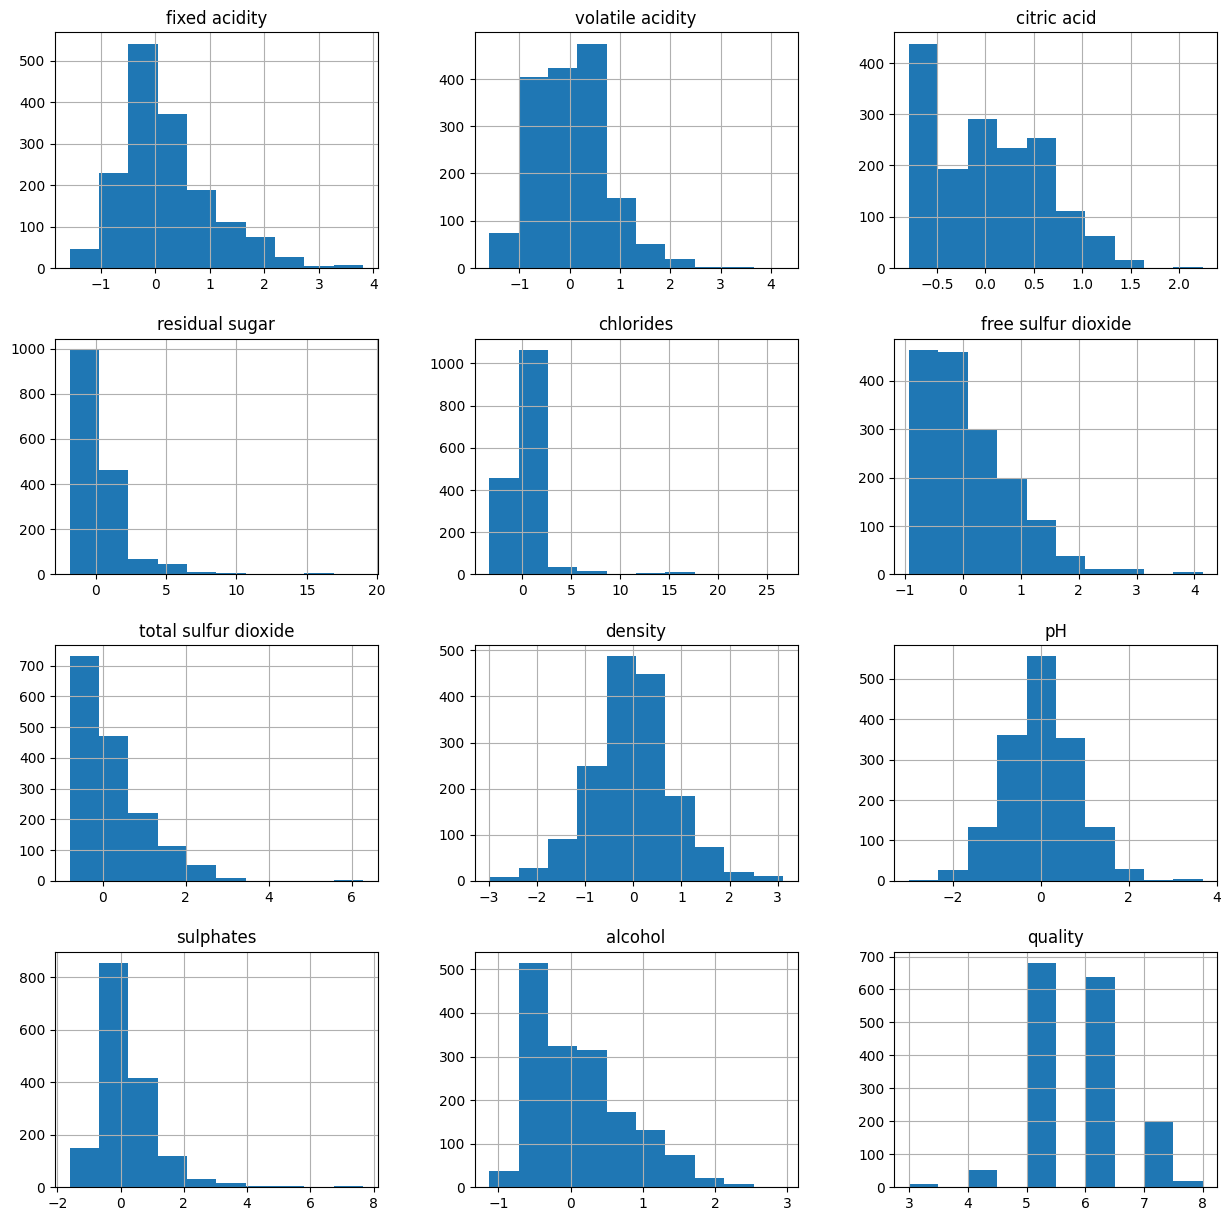

In [8]:
# 히스토그램
df.hist(figsize=(15, 15))

In [9]:
#Pairplot
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='quality', ylabel='count'>

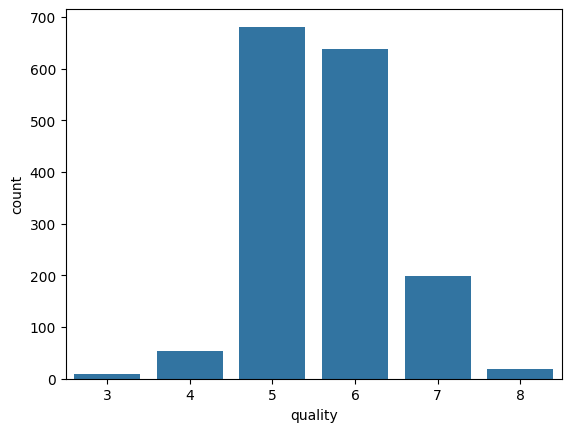

In [10]:
#Counterplot
sns.countplot(x='quality', data=df)

(데이터 분포 확인)

<Axes: >

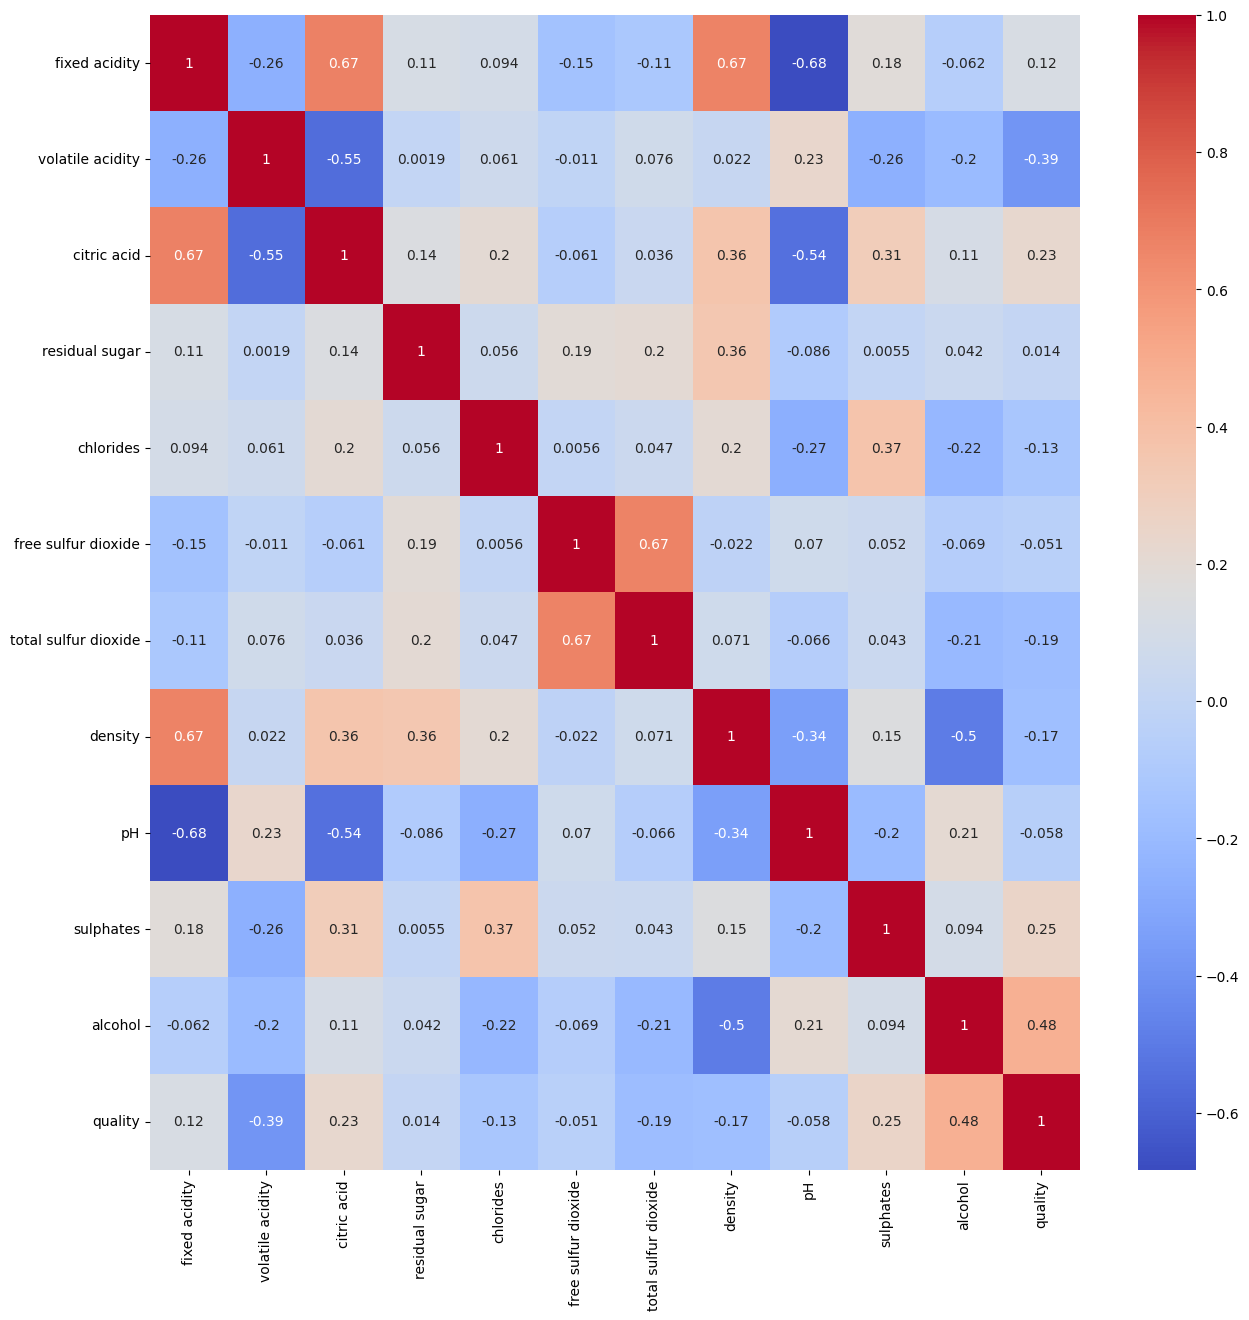

In [11]:
# Correlation Matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

(양의 상관 관계, 음의 상관 관계 분석하기)

<Axes: title={'center': 'Correlation between each column and quality'}>

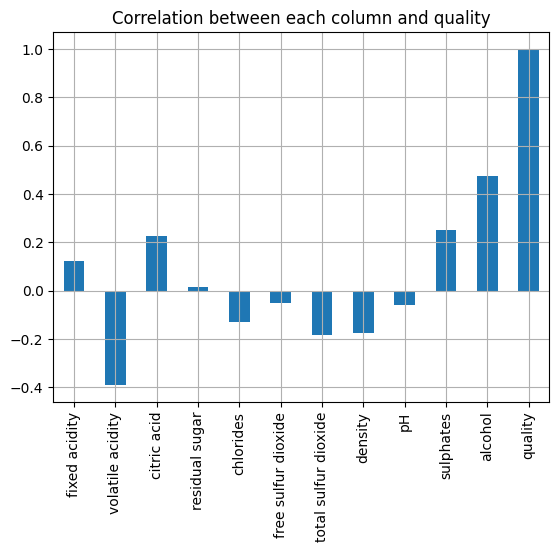

In [12]:
# quality와의 상관 관계 분석
df.corrwith(df.quality).plot.bar(title = "Correlation between each column and quality", grid = True)

### 모델 개발

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import preprocessing

In [14]:
# X
X = df.drop("quality",axis = 1)

# y, XGBoost를 위한 라벨 인코딩
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['quality'])

# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [15]:
# 다양한 품질 예측 모델 개발

# Logistic Regression
l = LogisticRegression()
l.fit(X_train, y_train)
y_pred_l = l.predict(X_test)

# Random Forest
r = RandomForestClassifier()
r.fit(X_train,y_train)
y_pred_r = r.predict(X_test)

# XGBoost
x = XGBClassifier()
x.fit(X_train,y_train)
y_pred_x = x.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# 교차 검증으로 모델 성능 평가하기
print("Accuracy of Logistic Regression :",metrics.accuracy_score(y_test, y_pred_l))
print("Accuracy of Random Forest :",metrics.accuracy_score(y_test, y_pred_r))
print("Accuracy of XGBoost :",metrics.accuracy_score(y_test, y_pred_x))

Accuracy of Logistic Regression : 0.615625
Accuracy of Random Forest : 0.73125
Accuracy of XGBoost : 0.696875


Random Forest의 정확도가 가장 높음. (각각의 방법들의 장점 및 단점, 왜 좋은지 등을 설명하면 좋을 것 같습니다.)

로지스틱 회귀 특징:
1. 모델이 선형 함수 기반임. 따라서 데이터가 선형일 때 강력한 성능을 드러냄
2. 상대적으로 적은 양의 데이터로도 학습 가능
3. 다른 모델에 비해 과적합에 강함.

로기스틱 회귀가 정확도가 높지 못한 이유: \
와인 데이터의 경우 피처와 품질 간의 관계가 비선형일 가능성이 높다. 따라서 이로 인해 높은 정확도를 보이지 못한다.

XGBoost 특징:
1. 여러 개의 결정 트리를 순차적으로 학습시켜 성능을 개선.
2. 매우 유연하며 비선형 관계를 잘 학습.
3. 각 단계에서 이전 단계의 오차를 줄이기 위해 학습하는 방식.

XGBoost가 높은 정확도를 보이지 못한 이유: \
XGBoost는 복잡한 모델로, 하이퍼파리미터 튜닝이 성능에 가장 큰 영향을 미침. 기본 설정으로 실행 할 경우 랜덤 포레스트보다 성능이 낮을 수 있음.

Random Forest의 특징:
1. 여러 개의 결정 트리를 앙상블하여 예측하는 비선형 모델.
2. 트리 앙상블을 통해 분산을 줄이고, 안정적인 예측을 함.
3. 하나의 트리를 사용할 때보다 과적합 문제를 피할 수 있음.

Random Forest의 정확도가 가장 높았던 이유:
1. Random Forest는 비선형 데이터에 대해 강력한 성능을 발휘한다. 와인 데이터의 특성상, 비선형 관계가 존재할 가능성이 높아 Random Forest가 더 적합함.
2. RobustScaler로 인해 이상치의 영향이 줄어들어 더욱 안정적이고 높은 성능을 발휘할 수 있습니다.


### 모델 평가 및 튜닝

랜덤포레스트 하이퍼파라미터 튜닝은 그리드 서치를 활용함.

파리미터 종류

n_estimators: \
설명: 랜덤 포레스트 안의 결정 트리 수. \
역할: 트리 수가 많을수록 성능이 좋아질 수 있지만, 계산 비용이 증가함.

max_features: \
설명: 각 분할에서 고려할 최대 피처 수.\
옵션: "auto" (모든 피처), "sqrt" (피처 수의 제곱근), "log2" (피처 수의 로그), 또는 특정 숫자.
역할: 적절한 값을 선택하여 모델 성능과 속도를 조절할 수 있음.

max_depth:\
설명: 각 트리의 최대 깊이.\
역할: 너무 깊으면 과적합될 수 있고, 너무 얕으면 학습이 충분하지 않을 수 있다.

min_samples_split: \
내부 노드를 분할하기 위한 최소 샘플 수.\
역할: 큰 값은 과적합을 방지하며, 작은 값은 모델이 데이터를 더 잘 학습하도록 함.

min_samples_leaf: \
설명: 리프 노드에 있어야 하는 최소 샘플 수.\
역할: 큰 값은 과적합을 방지하며, 작은 값은 모델이 데이터를 더 잘 학습하도록 함.

bootstrap:\
설명: 부트스트랩 샘플링을 사용할지 여부 (기본값: True).\
역할: True로 설정하면, 각각의 트리가 데이터의 무작위 샘플을 사용하여 학습됨.

criterion:\
설명: 분할 품질을 평가하는 기준. "gini" 또는 "entropy", "log_loss".\
역할: 분할 기준을 선택하여 모델의 성능을 조절할 수 있다.


# 튜닝



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [18]:
# data creation and preprocesssing
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

os=SMOTE() # SMOTE를 사용하여 클래스 불균형 문제 해결!
x_res,y_res = os.fit_resample(X,y) # x와 y레이블을 오버샘플링함.

x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.2, random_state=0) # 훈련 세트와 테스트 세트 분할!

sc = StandardScaler() # 표준화 방법 StandardScaler을 사용함.
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
# model initialization & training (학습)
rfc = RandomForestClassifier(random_state=100) # 시드 100 설정
svc = SVC(random_state=100)

svc.fit(x_train, y_train) #svc 모델 훈련
rfc.fit(x_train, y_train) #rfc 모델 훈련

RandomForestClassifier(random_state=100)

In [20]:
# prediction with training result (추론)
pred_rfc = rfc.predict(x_test)
pred_svc = svc.predict(x_test)
# 예측 수행 과정

In [21]:
# evaluation metric 정확도 계산.
acc_rfc = accuracy_score(y_test,pred_rfc)
acc_svc = accuracy_score(y_test,pred_svc)

print('rfc Accuracy : '+ str(round(acc_rfc*100,4)))
print('svc Accuracy : '+ str(round(acc_svc*100,4)))

rfc Accuracy : 85.0856
svc Accuracy : 77.5061


In [22]:
# hyperparms-search (Gridsearch)
parameters = {
    'n_estimators' : [80, 120, 240, 300],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}
rfc_cv = GridSearchCV(estimator=rfc, cv=20, param_grid=parameters).fit(x_train, y_train)
# 그리드 서치를 통해 최적의 하이퍼파라미터 서치
# 파라메터중 'n_estimators','criterion', 'max_features' 이 정확도에 유의미하게 변화를 줌.

In [23]:
# final result 마지막 결과 값.
print('Tuned hyper parameters : ', rfc_cv.best_params_)
print('accuracy : ', rfc_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 300}
accuracy :  0.8705689809965584


최적의 하이퍼라미터
Tuned hyper parameters :  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 120}
accuracy :  0.8711675145892563

In [53]:
# XGBoost 하이퍼파라미터 그리드 정의
xgb_parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.7]
}

# XGBoost 모델 초기화
xgb_model = xgb.XGBClassifier(random_state=100)

# 그리드 서치 실행
xgb_cv = GridSearchCV(estimator=xgb_model, param_grid=xgb_parameters, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_cv.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", xgb_cv.best_params_)
print("Best AUC score: ", xgb_cv.best_score_)

Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best AUC score:  0.880949475713547


### 결과 분석 및 시각화

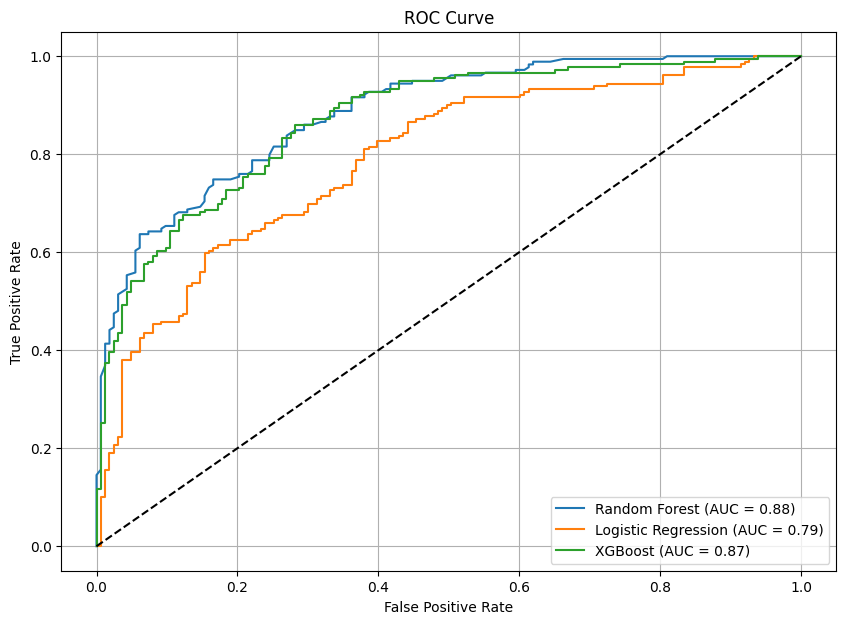

In [59]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score



# 이진 분류를 위해 레이블을 수정 (quality >= 6 을 양성, 그 외 음성)
y = (df['quality'] >= 6).astype(int)
X = df.drop('quality', axis=1)

# 오버샘플링
os = SMOTE()
x_res, y_res = os.fit_resample(X, y)

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=0)

# 데이터 표준화
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# 모델 초기화 및 학습
rfc = RandomForestClassifier(random_state=100, criterion='entropy', max_features='sqrt', n_estimators=300)
lr = LogisticRegression(random_state=100)
xgb_model = xgb.XGBClassifier(random_state=100, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300)

rfc.fit(x_train, y_train)
lr.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)

# 예측 확률 계산
rfc_probs = rfc.predict_proba(x_test)[:, 1]
lr_probs = lr.predict_proba(x_test)[:, 1]
xgb_probs = xgb_model.predict_proba(x_test)[:, 1]

# ROC 커브 계산
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# AUC 계산
rfc_auc = roc_auc_score(y_test, rfc_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# ROC 커브 시각화
plt.figure(figsize=(10, 7))
plt.plot(rfc_fpr, rfc_tpr, label=f'Random Forest (AUC = {rfc_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



3가지 모델 중 하이퍼 파라미터를 최적화 한 Random Forest가 AUC가 가장 높으므로, Random Forest 모델을 최종 모델로 결정해야한다.

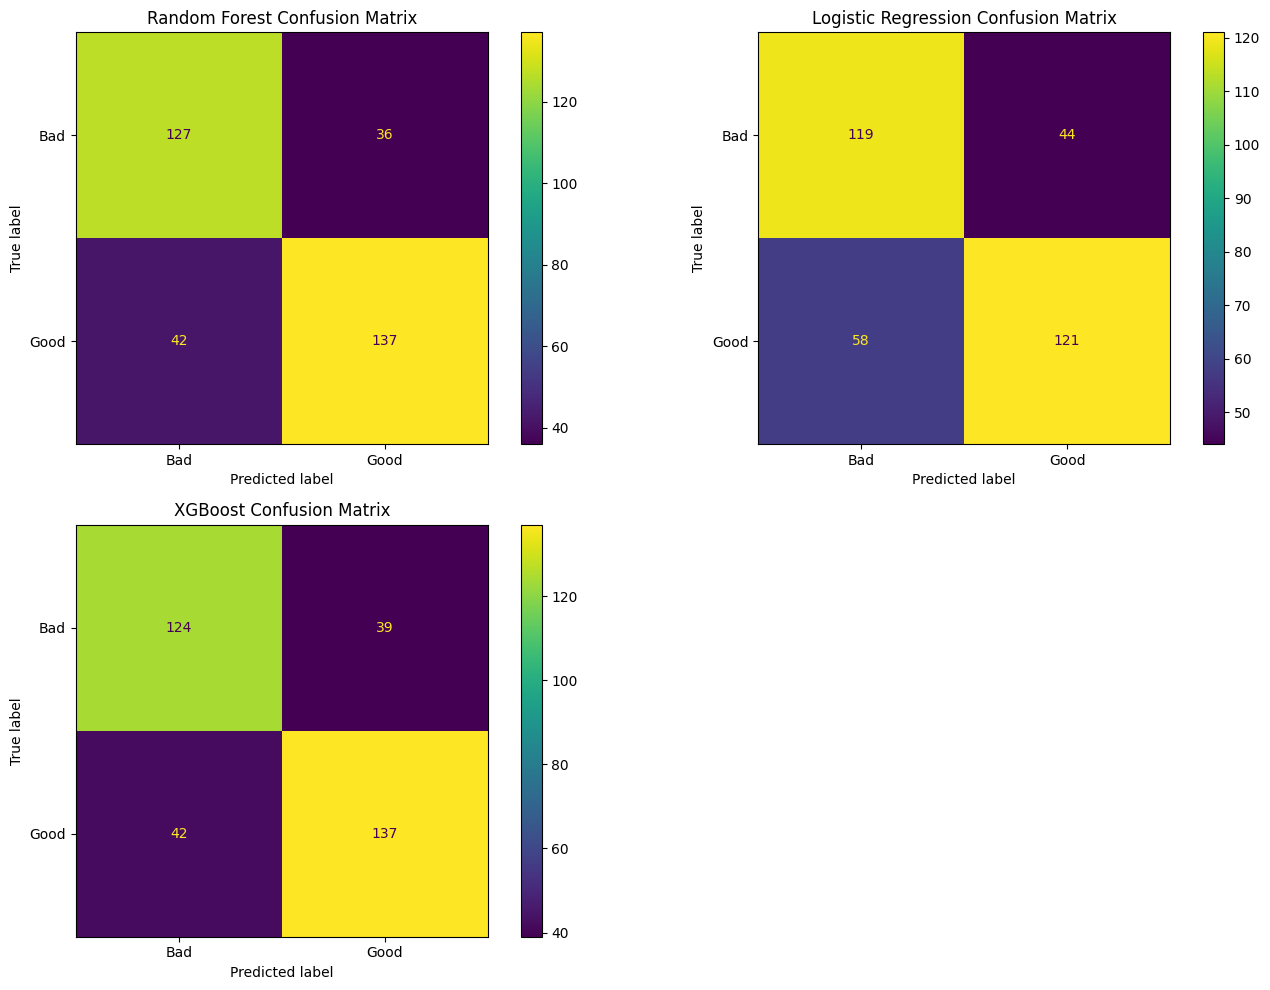

In [63]:

# Confusion Matrix 계산
conf_matrix_rfc = confusion_matrix(y_test, rfc.predict(x_test))
conf_matrix_lr = confusion_matrix(y_test, lr.predict(x_test))
conf_matrix_xgb = confusion_matrix(y_test, xgb_model.predict(x_test))

# Confusion Matrix 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ConfusionMatrixDisplay(conf_matrix_rfc, display_labels=['Bad', 'Good']).plot(ax=axes[0, 0])
axes[0, 0].set_title('Random Forest Confusion Matrix')

ConfusionMatrixDisplay(conf_matrix_lr, display_labels=['Bad', 'Good']).plot(ax=axes[0, 1])
axes[0, 1].set_title('Logistic Regression Confusion Matrix')

ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=['Bad', 'Good']).plot(ax=axes[1, 0])
axes[1, 0].set_title('XGBoost Confusion Matrix')

# 마지막 서브플롯 비우기
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

위의 3가지 혼동행렬 중 Random Forest 모델인 경우 제 1,2종 오류가 가장 낮은것을 확인 할 수 있다.

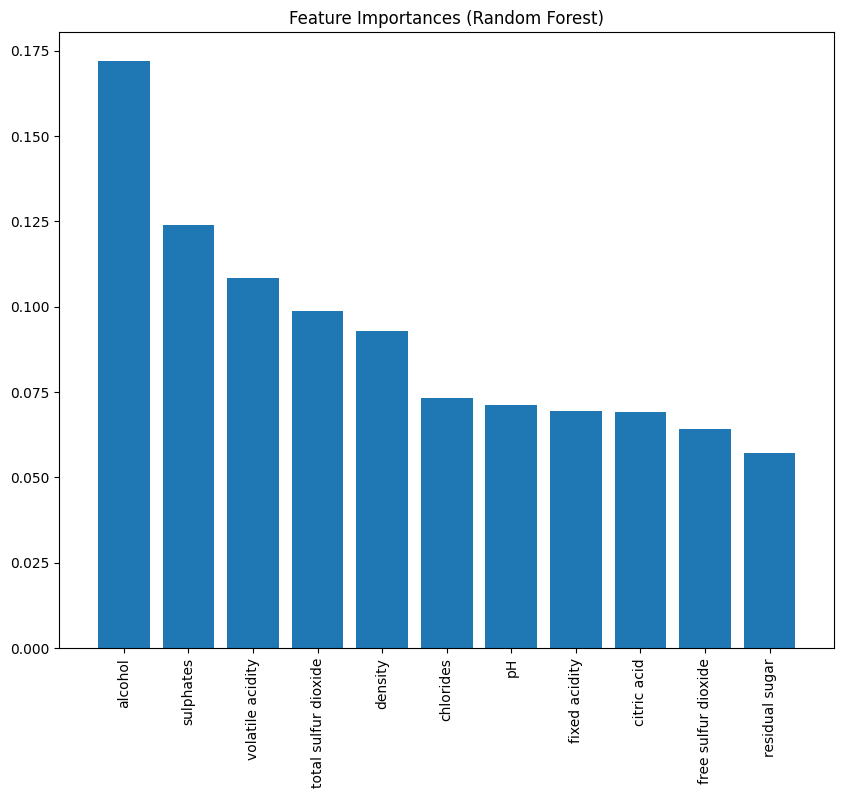

In [57]:
# 랜덤 포레스트의 특성 중요도 계산 및 시각화
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

랜덤 포레스트에서 중요한 특성 상위 3가지는 alcohol, sulphates, volatile acdity으로 나타난다.

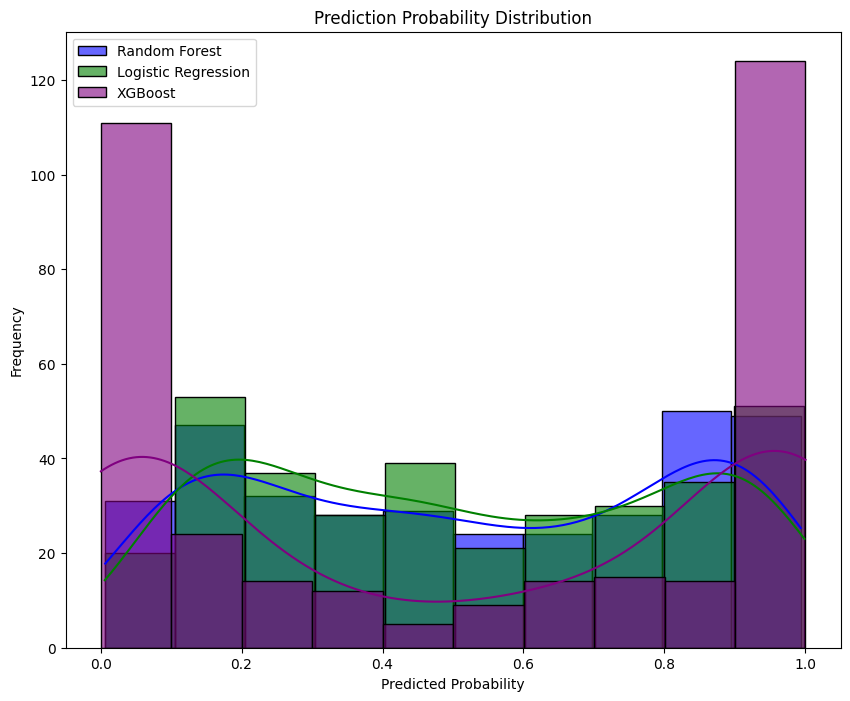

In [64]:
# 예측 값 분포 시각화
plt.figure(figsize=(10, 8))
sns.histplot(rfc_probs, kde=True, label='Random Forest', color='blue', alpha=0.6)
sns.histplot(lr_probs, kde=True, label='Logistic Regression', color='green', alpha=0.6)
sns.histplot(xgb_probs, kde=True, label='XGBoost', color='purple', alpha=0.6)
plt.title('Prediction Probability Distribution')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

대체적으로 Random Forest, Logistic Regression 모델의 확률 분포는 고르게 분포되어 있으므로, 보수적인 예측을 하는 경향이 있다.
반면 XGBoost는 0과 1에 극단적으로 분포되어 있으므로, 예측에 매우 확신을 가지며 강한 판단을 내린다. 위와 같이 극단적인 예측을 선호하는 경우 XGBoost 모델을 선호하고, 보수적인 예측을 선호하는 경우 Random Forest, Logistic Regression 모델을 선호한다.

### 결론


결과 요약:
- 모델 성능:
  - 랜덤 포레스트, 로지스틱 회귀, XGBoost 모델을 비교 평가한 결과, ROC 커브와 AUC를 통해 각 모델의 성능을 시각화하고 비교했다.
  - 혼동 행렬을 통해 각 모델의 분류 성능을 평가했다.
  - ROC 커브와 AUC, 혼동 행렬을 통해 (레드)와인의 품질을 예측하는 모델중 가장 우수한 모델을 Random Forest로 선정하였다.

- 특성 중요도:
  - 랜덤 포레스트 모델의 특성 중요도 분석 결과, 품질에 가장 큰 영향을 미치는 특성들은 알코올(alcohol), 황산(sulphates), 휘발성 산도(volatile acidity)로 나타났다.
  - 이러한 특성들은 와인의 화학적 구성 요소로, 와인의 맛, 향, 안정성 등에 영향을 미칩니다.

시사점:
- 모델 선택: 다양한 모델을 비교한 결과, 특정 모델이 다른 모델보다 더 나은 성능을 보이는 것을 확인할 수 있다. 예를 들어, XGBoost 모델이 AUC 점수에서 가장 높은 성능을 보였다면, 이 모델을 선택하는 것이 좋다.
- 데이터 이해: 특성 중요도 분석을 통해 와인 품질에 영향을 미치는 주요 요소를 파악함으로써, 와인 제조 과정에서 어떤 부분에 주의를 기울여야 하는지 알 수 있다. 특히 알코올, 황산, 휘발성 산도는 중요한 조절 요소가 된다.
- 향후 연구: 추가 데이터 수집 및 다양한 하이퍼파라미터 튜닝을 통해 모델 성능을 더욱 향상시킬 수 있다. 또한, 앙상블 기법을 통해 더욱 뛰어난 모델을 개발할 수 있다.
